# Spotipy Imports

In [28]:
import os
import json
import spotipy
import spotipy.util as util
from json.decoder import JSONDecodeError

from config import *

In [29]:
import numpy as np
import pandas as pd

### Username number

In [2]:
username = '12166626141'

In [3]:
scope_list = ['user-read-currently-playing','user-read-playback-state',\
              'user-follow-read','user-library-read','user-top-read','user-read-recently-played']

# Throw all permissions from the list into a string for token function:
scope = ' '.join(scope_list)

## Authourize access

In [4]:
token = util.prompt_for_user_token(username,scope=scope,\
    client_id=client_id,\
    client_secret=client_secret,\
    redirect_uri=redirect_uri)

# except:
#     print("exception")
#     os.remove(f'.cache-{username}')
#     token = util.prompt_for_user_token(username,scope=scope,\
#         client_id=client_id,\
#         client_secret=client_secret,\
#         redirect_uri=redirect_uri)

In [5]:
sp = spotipy.Spotify(auth=token)

#### To see what is stored: print(json.dumps(VARIABLE, sort_keys=True, indent=4))

### Test if followed artist is working!

In [6]:
followed = sp.current_user_followed_artists()
print(json.dumps(followed, sort_keys=True, indent=4))

{
    "artists": {
        "cursors": {
            "after": null
        },
        "href": "https://api.spotify.com/v1/me/following?type=artist&limit=20",
        "items": [
            {
                "external_urls": {
                    "spotify": "https://open.spotify.com/artist/2GeCWViPdZTMAUwjU4wDsV"
                },
                "followers": {
                    "href": null,
                    "total": 15
                },
                "genres": [],
                "href": "https://api.spotify.com/v1/artists/2GeCWViPdZTMAUwjU4wDsV",
                "id": "2GeCWViPdZTMAUwjU4wDsV",
                "images": [
                    {
                        "height": 640,
                        "url": "https://i.scdn.co/image/1cef55271477ac352b83fa59c2c2e834ff71b4b7",
                        "width": 640
                    },
                    {
                        "height": 320,
                        "url": "https://i.scdn.co/image/3f4d82b2fc91075e8763e9f0

### Test if search Artist is working!

In [37]:
search_input = input("Artist to search for: ")
search_results = sp.search(\
	search_input,\
	limit=1,\
	offset=0,\
	type="artist"\
	)
artist = search_results['artists']['items'][0]
print(json.dumps(artist, sort_keys=True, indent=4))

Artist to search for: tycho
{
    "external_urls": {
        "spotify": "https://open.spotify.com/artist/5oOhM2DFWab8XhSdQiITry"
    },
    "followers": {
        "href": null,
        "total": 430519
    },
    "genres": [
        "chillwave",
        "downtempo",
        "intelligent dance music"
    ],
    "href": "https://api.spotify.com/v1/artists/5oOhM2DFWab8XhSdQiITry",
    "id": "5oOhM2DFWab8XhSdQiITry",
    "images": [
        {
            "height": 640,
            "url": "https://i.scdn.co/image/988f189c4e909d172c0672af6fd0a131a659e70c",
            "width": 640
        },
        {
            "height": 320,
            "url": "https://i.scdn.co/image/e242f25f1e9a599fec6d9a4697f5f37e30846719",
            "width": 320
        },
        {
            "height": 160,
            "url": "https://i.scdn.co/image/71c5e47ce1547273666868ce3d094721859166e5",
            "width": 160
        }
    ],
    "name": "Tycho",
    "popularity": 63,
    "type": "artist",
    "uri": "spoti

In [38]:
artist_id = artist["id"]

### Find artist by current users top played

In [39]:
top_artist = sp.current_user_top_artists()
top_artist_names = top_artist['items'][3]
print(json.dumps(top_artist_names, sort_keys=True, indent=4))

{
    "external_urls": {
        "spotify": "https://open.spotify.com/artist/4lgrzShsg2FLA89UM2fdO5"
    },
    "followers": {
        "href": null,
        "total": 62443
    },
    "genres": [
        "avantgarde metal",
        "djent",
        "jazz metal",
        "norwegian metal",
        "progressive metal"
    ],
    "href": "https://api.spotify.com/v1/artists/4lgrzShsg2FLA89UM2fdO5",
    "id": "4lgrzShsg2FLA89UM2fdO5",
    "images": [
        {
            "height": 640,
            "url": "https://i.scdn.co/image/94b3e8f9cc25c9fac28f9e2552bc42f4a0ceef40",
            "width": 640
        },
        {
            "height": 320,
            "url": "https://i.scdn.co/image/802602492d4ebc2d20ca3444db47ceb1612ba369",
            "width": 320
        },
        {
            "height": 160,
            "url": "https://i.scdn.co/image/a04ed4d94bd4d683994fe93dcd5ae90f576a747b",
            "width": 160
        }
    ],
    "name": "Leprous",
    "popularity": 52,
    "type": "artist"

# Pull Audio Analysis for currently playing song

## Let's try using audio_features instead

#### Note: artist_id defined in search section above

In [40]:
#artist id defined in search artist section: 

top_tracks = sp.artist_top_tracks(artist_id)

print(json.dumps(top_tracks, sort_keys=True, indent=4))

{
    "tracks": [
        {
            "album": {
                "album_type": "album",
                "artists": [
                    {
                        "external_urls": {
                            "spotify": "https://open.spotify.com/artist/5oOhM2DFWab8XhSdQiITry"
                        },
                        "href": "https://api.spotify.com/v1/artists/5oOhM2DFWab8XhSdQiITry",
                        "id": "5oOhM2DFWab8XhSdQiITry",
                        "name": "Tycho",
                        "type": "artist",
                        "uri": "spotify:artist:5oOhM2DFWab8XhSdQiITry"
                    }
                ],
                "external_urls": {
                    "spotify": "https://open.spotify.com/album/7HWdGPosPkb9GY5MOgLgSW"
                },
                "href": "https://api.spotify.com/v1/albums/7HWdGPosPkb9GY5MOgLgSW",
                "id": "7HWdGPosPkb9GY5MOgLgSW",
                "images": [
                    {
                        "h

In [41]:
top_tracks['tracks'][0]['album']['release_date']

'2014-03-18'

In [43]:
track_list = []
track_names = []
track_pop = []
track_release = []

for song in top_tracks['tracks']:
    track_list.append(song['id'])
    track_names.append(song['name'])
    track_pop.append(song['popularity'])
    track_release.append(song['album']['release_date'])
print(track_list)

['2qC1sUo8xxRRqYsaYEdDuZ', '6koWevx9MqN6efQ6qreIbm', '1nzLNeyk835Q9h1zPS4gr9', '5EeNRe6Fi29tTrssVzl4dw', '7EE7jbv7Dv8ZkyWBlKhPXX', '18rXOovmohAMcFwUPAUAN2', '3Lr9aRWF57Dd8NsjeWTKNp', '1zTmKEtaxIqi2ByGBLmI3s', '1RjP07A2H4WMmozQidd9x7', '78qM62MHvNxFJLpShqmq28']


In [44]:
track_features = sp.audio_features(track_list)
print(json.dumps(track_features, sort_keys=True, indent=4))
print(type(track_features))

[
    {
        "acousticness": 0.0585,
        "analysis_url": "https://api.spotify.com/v1/audio-analysis/2qC1sUo8xxRRqYsaYEdDuZ",
        "danceability": 0.552,
        "duration_ms": 283636,
        "energy": 0.878,
        "id": "2qC1sUo8xxRRqYsaYEdDuZ",
        "instrumentalness": 0.892,
        "key": 1,
        "liveness": 0.0746,
        "loudness": -5.767,
        "mode": 1,
        "speechiness": 0.0353,
        "tempo": 176.057,
        "time_signature": 4,
        "track_href": "https://api.spotify.com/v1/tracks/2qC1sUo8xxRRqYsaYEdDuZ",
        "type": "audio_features",
        "uri": "spotify:track:2qC1sUo8xxRRqYsaYEdDuZ",
        "valence": 0.598
    },
    {
        "acousticness": 0.329,
        "analysis_url": "https://api.spotify.com/v1/audio-analysis/6koWevx9MqN6efQ6qreIbm",
        "danceability": 0.659,
        "duration_ms": 316919,
        "energy": 0.716,
        "id": "6koWevx9MqN6efQ6qreIbm",
        "instrumentalness": 0.909,
        "key": 9,
        "livene

In [45]:
df_feat = pd.DataFrame(track_features)
df_feat['Name'] = track_names
df_feat['popularity'] = track_pop
df_feat['Date'] = track_release
df_feat.set_index('Name',inplace=True)
df_feat.drop(columns=['analysis_url','track_href','type','uri'], inplace=True)
df_feat.head(10)

,acousticness,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity,Date
Name,,,,,,,,,,,,,,,,
Awake,0.05850,0.552,283636,0.878,2qC1sUo8xxRRqYsaYEdDuZ,0.892000,1,0.0746,-5.767,1,0.0353,176.057,4,0.5980,59,2014-03-18
A Walk,0.32900,0.659,316919,0.716,6koWevx9MqN6efQ6qreIbm,0.909000,9,0.1270,-7.816,1,0.0317,139.952,4,0.3820,58,2011-10-04
Across The Room - Tycho Remix,0.00371,0.383,231910,0.765,1nzLNeyk835Q9h1zPS4gr9,0.000061,6,0.1010,-7.295,1,0.0539,177.890,4,0.1600,57,2018-06-20
Epoch,0.07110,0.559,345387,0.743,5EeNRe6Fi29tTrssVzl4dw,0.900000,1,0.1520,-9.447,1,0.0532,119.981,4,0.2640,56,2016-09-30
Hours,0.00442,0.580,344158,0.819,7EE7jbv7Dv8ZkyWBlKhPXX,0.957000,8,0.0728,-8.177,1,0.0413,120.007,4,0.3210,51,2011-10-04
Melanine,0.85700,0.444,173338,0.470,18rXOovmohAMcFwUPAUAN2,0.929000,8,0.0901,-8.876,0,0.0314,146.318,4,0.0860,51,2011-10-04
Division,0.00428,0.485,238745,0.902,3Lr9aRWF57Dd8NsjeWTKNp,0.856000,0,0.2810,-7.878,1,0.0317,172.572,1,0.4260,50,2016-09-30
Daydream,0.07690,0.644,334459,0.824,1zTmKEtaxIqi2ByGBLmI3s,0.979000,8,0.0699,-8.109,1,0.0364,140.020,4,0.3110,50,2011-10-04
Dive,0.01520,0.629,499791,0.802,1RjP07A2H4WMmozQidd9x7,0.918000,6,0.3880,-8.320,0,0.1020,140.067,4,0.5780,49,2011-10-04


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [47]:
df_stats = df_feat.drop(columns=['id','key','mode','time_signature','Date', 'duration_ms', 'loudness','tempo','popularity'])

In [48]:
df_stats

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence
Name,,,,,,,
Awake,0.05850,0.552,0.878,0.892000,0.0746,0.0353,0.5980
A Walk,0.32900,0.659,0.716,0.909000,0.1270,0.0317,0.3820
Across The Room - Tycho Remix,0.00371,0.383,0.765,0.000061,0.1010,0.0539,0.1600
Epoch,0.07110,0.559,0.743,0.900000,0.1520,0.0532,0.2640
Hours,0.00442,0.580,0.819,0.957000,0.0728,0.0413,0.3210
Melanine,0.85700,0.444,0.470,0.929000,0.0901,0.0314,0.0860
Division,0.00428,0.485,0.902,0.856000,0.2810,0.0317,0.4260
Daydream,0.07690,0.644,0.824,0.979000,0.0699,0.0364,0.3110
Dive,0.01520,0.629,0.802,0.918000,0.3880,0.1020,0.5780


In [49]:
df_stats.mean()
df_stats.columns
pd.melt(df_stats)

,variable,value
0,acousticness,0.05850
1,acousticness,0.32900
2,acousticness,0.00371
3,acousticness,0.07110
4,acousticness,0.00442
5,acousticness,0.85700
6,acousticness,0.00428
7,acousticness,0.07690
8,acousticness,0.01520
9,acousticness,0.68600


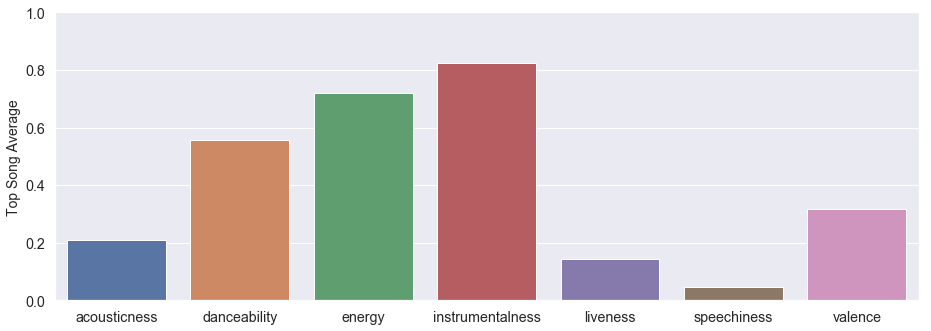

In [50]:
sns.set(style='whitegrid')
sns.set(font_scale=1.3) 

fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([.1,.1,.8,.8])
ax.set(ylim = (0,1))
sns.barplot(x=df_stats.columns, y=df_stats.mean())

ax.set_ylabel('Top Song Average', fontsize=14)
plt.show()

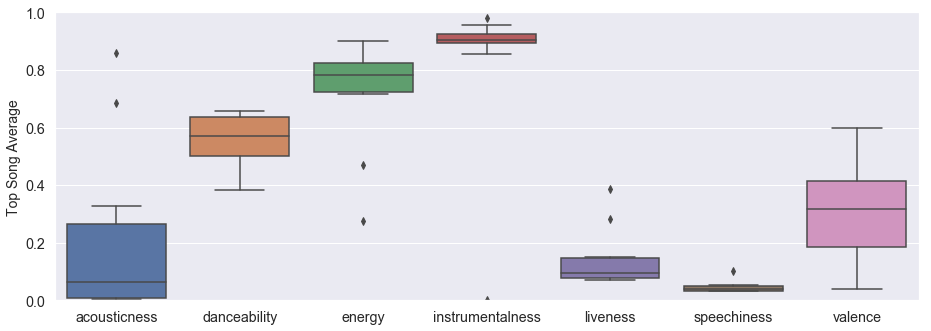

In [51]:
sns.set(style='whitegrid')
sns.set(font_scale=1.3) 

fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([.1,.1,.8,.8])
ax.set(ylim = (0,1))
sns.boxplot(x='variable', y='value', data=pd.melt(df_stats))
ax.set_xlabel('')
ax.set_ylabel('Top Song Average', fontsize=14)
plt.show()